## Setup
Import the required packages and load the lending club dataset from CSV file.

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add the parent directory to the Python path to import the core module
sys.path.append(os.path.abspath(os.path.join("..")))

from core import get_data_path

csv_file_path = get_data_path("assignment2/lc_14to16.csv")
data = pd.read_csv(csv_file_path)

C:\Users\suxro\AppData\Local\Temp\ipykernel_22560\3695662434.py:15: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


## 2. Preprocessing
### a. Standardize the numerical features and encode the categorical features

In [2]:
# Display few rows of the data and 20 columns
display(data.iloc[:0:20].head())

# Example Task 1: Combine employment length into 3 categories:
# #  "< 1 year", "1 year" = 0-1 years
# # "2 years, 3 years, 4 years =  2-4 years
# # everything else =  5+ years

data["emp_length"] = data["emp_length"].replace(["< 1 year", "1 year"], "0-1 years")
data["emp_length"] = data["emp_length"].replace(["2 years", "3 years", "4 years", "5 years"], "2-5 years")
data["emp_length"] = data["emp_length"].replace([ "6 years", "7 years", "8 years", "9 years", "10+ years"], "5+ years")

# Filter out the rows with "ANY" in the home_ownership column
data = data[data["home_ownership"] != "ANY"]

display(data["home_ownership"].value_counts())

# Example Task 3: Subset data with only the following columns: "loan_amnt",  "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "grade", "emp_length", "home_ownership", delinq_2yrs

data = data[["loan_amnt",  "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "grade", "emp_length", "home_ownership", "delinq_2yrs"]]
display(data.head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,2015-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN


home_ownership
MORTGAGE    539136
RENT        430072
OWN         121810
Name: count, dtype: int64

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,delinq_2yrs
0,3600.0,55000.0,5.91,0.0,722.0,144904.0,9300.0,C,5+ years,MORTGAGE,0.0
1,24700.0,65000.0,16.06,0.0,0.0,204396.0,111800.0,C,5+ years,MORTGAGE,1.0
2,20000.0,63000.0,10.78,0.0,0.0,189699.0,14000.0,B,5+ years,MORTGAGE,0.0
3,35000.0,110000.0,17.06,0.0,0.0,301500.0,67300.0,C,5+ years,MORTGAGE,0.0
4,10400.0,104433.0,25.37,0.0,0.0,331730.0,34000.0,F,2-5 years,MORTGAGE,1.0


In [3]:
from sklearn.discriminant_analysis import StandardScaler
# Standardize numerical variables: "loan_amnt", "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"

scaler = StandardScaler()
numerical_vars = ["loan_amnt", "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

display(data.head())

# ---------------------------------------------------------------------------------
# Report of missing values
# ---------------------------------------------------------------------------------
print("Missing Values:")
display(data.isnull().sum())

# ---------------------------------------------------------------------------------
# Eliminate rows with missing values
# One must be careful with this step, as it can lead to a huge loss of information
# Later we will see how to impute missing values using multidimesional imputation
# ---------------------------------------------------------------------------------

data = data.dropna()
print("Missing values after clean up:")
display(data.isnull().sum())

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,delinq_2yrs
0,-1.303220,-0.313560,-1.376684,-0.073154,0.050524,0.022563,-0.654247,C,5+ years,MORTGAGE,0.0
1,1.117573,-0.174304,-0.292318,-0.073154,-0.029361,0.401098,2.153184,C,5+ years,MORTGAGE,1.0
2,0.578344,-0.202155,-0.856402,-0.073154,-0.029361,0.307584,-0.525516,B,5+ years,MORTGAGE,0.0
3,2.299287,0.452350,-0.185483,-0.073154,-0.029361,1.018950,0.934348,C,5+ years,MORTGAGE,0.0
4,-0.523059,0.374826,0.702308,-0.073154,-0.029361,1.211297,0.022276,F,2-5 years,MORTGAGE,1.0


Missing Values:


loan_amnt               0
annual_inc              0
dti                    65
acc_now_delinq          0
tot_coll_amt            0
tot_cur_bal             0
total_rev_hi_lim        0
grade                   0
emp_length          64042
home_ownership          0
delinq_2yrs             0
dtype: int64

Missing values after clean up:


loan_amnt           0
annual_inc          0
dti                 0
acc_now_delinq      0
tot_coll_amt        0
tot_cur_bal         0
total_rev_hi_lim    0
grade               0
emp_length          0
home_ownership      0
delinq_2yrs         0
dtype: int64

### b. Identify and remove up to 1% of rows as outliers based on standardized `dti`, `annualincome`, and `delinq_2yrs` variables

In [4]:
# Features to check for outliers
outlier_features = ["dti", "annual_inc", "delinq_2yrs"]

# Standardize these features (if not already done)
data[outlier_features] = scaler.fit_transform(data[outlier_features])

# Sum the absolute standardized scores
data["outlier_score"] = data[outlier_features].abs().sum(axis=1)

# Calculate IQR
Q1 = data["outlier_score"].quantile(0.25)
Q3 = data["outlier_score"].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data["outlier_score"] < lower_bound) | (data["outlier_score"] > upper_bound)]

# Determine the number of outliers to remove (up to 1% of total data)
max_outliers = int(0.01 * len(data))
outliers_to_remove = outliers.head(max_outliers)

# Remove outliers
data_cleaned = data.drop(outliers_to_remove.index).reset_index(drop=True)

# Remove temporary columns
data_cleaned = data_cleaned.drop(columns=["outlier_score"])

# Calculate the percentage of data retained
retained_data_percent = (data_cleaned.shape[0] / data.shape[0]) * 100

# Check the shape of the cleaned data
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)
print("Number of Outliers Removed:", outliers_to_remove.shape[0])
print("Percentage of Data Retained: {:.2f}%".format(retained_data_percent))

Original Data Shape: (1026973, 12)
Cleaned Data Shape: (1016704, 12)
Number of Outliers Removed: 10269
Percentage of Data Retained: 99.00%


## 3. Classification Task
### a. Split the data into Train-Validate-Test

In [5]:
# ---------------------------------------------------------------- 
# Convert grade to a tertiary variable: A,B = High, DEFG = Low,C = Medium
# Adding a new column to the dataframe called "grade_tertiary"
# ---------------------------------------------------------------- 

# Create a copy of the cleaned data
high_med_low_data = data_cleaned.copy()

# Create a new column called "grade_tertiary" and assign the values
high_med_low_data["grade_tertiary"] = high_med_low_data["grade"].replace(["A", "B"], "3.High").replace(["C"], "2.Medium").replace(["D", "E", "F", "G"], "1.Low")

# filter out Medium for the grade_tertiary column for high-low data
high_low_data = high_med_low_data[high_med_low_data["grade_tertiary"] != "2.Medium"]

print("Grade Tertiary for the high-medium-low data:")
display(high_med_low_data["grade_tertiary"].value_counts())

print("Grade Tertiary for the high-low data:")
display(high_low_data["grade_tertiary"].value_counts())

display(high_low_data.head())
display(high_med_low_data.head())

grade_tertiary
3.High      466221
2.Medium    300487
1.Low       260265
Name: count, dtype: int64

Grade Tertiary for the original data:


grade_tertiary
3.High      466221
2.Medium    300487
1.Low       260265
Name: count, dtype: int64

Grade Tertiary for the filtered data:


grade_tertiary
3.High    466221
1.Low     260265
Name: count, dtype: int64

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,delinq_2yrs,outlier_score,grade_tertiary
0,-1.303220,-0.331003,-1.462507,-0.073154,0.050524,0.022563,-0.654247,C,5+ years,MORTGAGE,-0.380643,2.174153,2.Medium
1,1.117573,-0.194028,-0.300970,-0.073154,-0.029361,0.401098,2.153184,C,5+ years,MORTGAGE,0.686828,1.181826,2.Medium
2,0.578344,-0.221423,-0.905198,-0.073154,-0.029361,0.307584,-0.525516,B,5+ years,MORTGAGE,-0.380643,1.507264,3.High
3,2.299287,0.422361,-0.186533,-0.073154,-0.029361,1.018950,0.934348,C,5+ years,MORTGAGE,-0.380643,0.989537,2.Medium
4,-0.523059,0.346107,0.764440,-0.073154,-0.029361,1.211297,0.022276,F,2-5 years,MORTGAGE,0.686828,1.797374,1.Low


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical features: "emp_length", "home_ownership"
one_hot_encoder = OneHotEncoder(sparse_output=False)

categorical_features = ["emp_length", "home_ownership"]

# Encode the categorical features for the High-Low data
high_low_encdata = pd.get_dummies(high_low_data, columns=categorical_features)

# Encode the categorical features for the High-Medium-Low data
high_med_low_encdata = pd.get_dummies(high_med_low_data, columns=categorical_features)

display(high_low_encdata.head())

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,delinq_2yrs,outlier_score,grade_tertiary,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
2,0.578344,-0.221423,-0.905198,-0.073154,-0.029361,0.307584,-0.525516,B,-0.380643,1.507264,3.High,False,False,True,True,False,False
4,-0.523059,0.346107,0.764440,-0.073154,-0.029361,1.211297,0.022276,F,0.686828,1.797374,1.Low,False,True,False,True,False,False
6,0.578344,1.381188,-0.460038,-0.073154,-0.029361,1.393450,1.671128,B,-0.380643,2.221869,3.High,False,False,True,True,False,False
7,0.578344,0.079923,-0.123593,-0.073154,-0.029361,0.001547,-0.511821,B,0.686828,0.890343,3.High,False,False,True,True,False,False
8,-0.568951,0.079923,-0.643137,-0.073154,0.893526,-0.721546,-0.079066,A,-0.380643,1.103703,3.High,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features and target for both high-low
X_hl = high_low_encdata.drop(columns=["grade_tertiary", "grade"])
y_hl = high_low_encdata["grade_tertiary"]

# Split the data into features and target for high-medium-low
X_hml = high_med_low_encdata.drop(columns=["grade_tertiary", "grade"])
y_hml = high_med_low_encdata["grade_tertiary"]

# Split the data into training and testing sets into 80% training and 20% testing for High-Low data
X_hl_train, X_hl_test, y_hl_train, y_hl_test = train_test_split(X_hl, y_hl, test_size=0.2, random_state=42)

# High-Medium-Low data training and testing sets
X_hml_train, X_hml_test, y_hml_train, y_hml_test = train_test_split(X_hml, y_hml, test_size=0.2, random_state=42)

### b. Build a logistic model to accurately predict the High-Low response.

              precision    recall  f1-score   support

       1.Low       0.67      0.46      0.55     51565
      3.High       0.75      0.88      0.81     93733

    accuracy                           0.73    145298
   macro avg       0.71      0.67      0.68    145298
weighted avg       0.72      0.73      0.71    145298



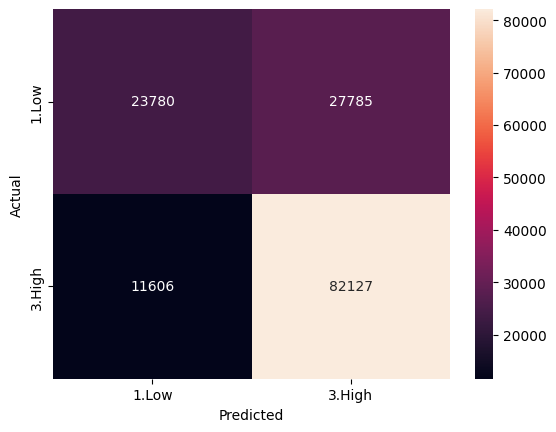

['1.Low' '3.High']


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Run logistic regression on grade_tertiary as the target variable and the rest (exclusing grade) as the predictors
logit = LogisticRegression(max_iter=1000)
logit.fit(X_hl_train, y_hl_train)

y_pred = logit.predict(X_hl_test)
accuracy_score(y_hl_test, y_pred)

# Classification report

print(classification_report(y_hl_test, y_pred))

# Confusion matrix
confusion_matrix(y_hl_test, y_pred)

# print a labeled confusion matrix
cm = confusion_matrix(y_hl_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["1.Low", "3.High"], yticklabels=["1.Low", "3.High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classes:", logit.classes_)

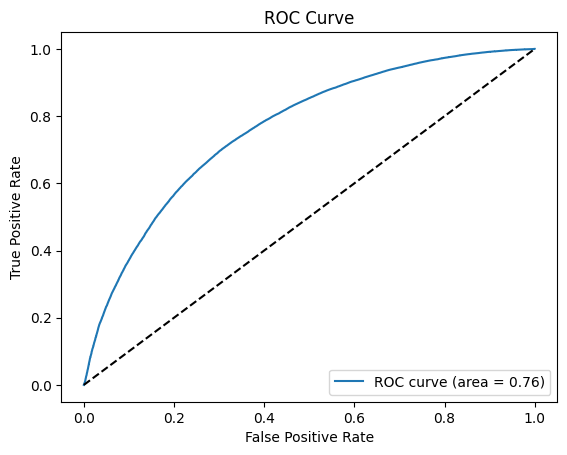

In [8]:
from sklearn.metrics import auc, roc_curve

# ---------------------------------------------------
# Add predicted probability to the dataframe
# ---------------------------------------------------

high_low_encdata["predicted"] = logit.predict(X_hl)
high_low_encdata["predicted_prob"] = logit.predict_proba(X_hl)[:,1]
display(high_low_encdata.head())


# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_hl_test, logit.predict_proba(X_hl_test)[:1], pos_label="3.High")
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

       1.Low       0.59      0.62      0.61     51565
      3.High       0.79      0.77      0.78     93733

    accuracy                           0.71    145298
   macro avg       0.69      0.69      0.69    145298
weighted avg       0.72      0.71      0.72    145298



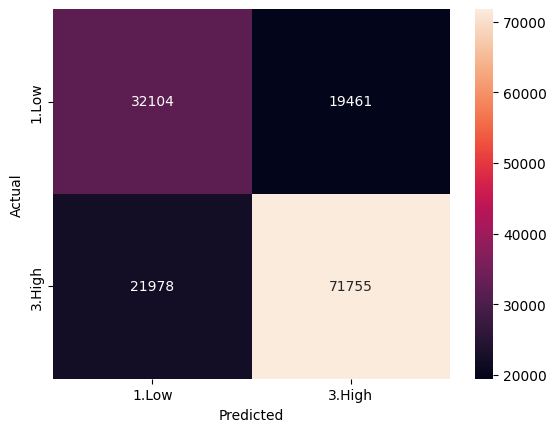

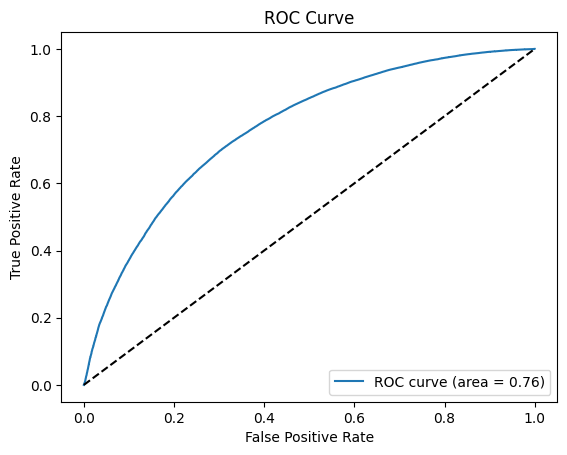

In [9]:
from sklearn.metrics import auc, roc_curve

# Now repeat the above by changing the threshold to 0.6
y_pred_06 = (logit.predict_proba(X_hl_test)[:1] > 0.6).astype(int)

# # Convert predicted labels back to original label types
y_pred_06 = np.where(y_pred_06 == 1, "3.High", "1.Low")

print(classification_report(y_hl_test, y_pred_06))

cm = confusion_matrix(y_hl_test, y_pred_06)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["1.Low", "3.High"], yticklabels=["1.Low", "3.High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_hl_test, logit.predict_proba(X_hl_test)[:,1], pos_label="3.High")
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [10]:
# ---------------------------------------------------
# Losgistic regression sklearn page:https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

# Hyperparameter tuning for logistic regression
# the most important hyperparameter for logistic regression is C, which is the inverse of the regularization strength   
# smaller values of C specify stronger regularization
# Regularization is a technique used to prevent overfitting by penalizing large coefficients
# The default value of C is 1

from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logit = LogisticRegression(max_iter=1000)
logit_cv = GridSearchCV(logit, param_grid, cv=5)
logit_cv.fit(X_hl_train, y_hl_train)

print("Best parameters:", logit_cv.best_params_)
print("BestScore:", logit_cv.best_score_)
print("Best Estimator:", logit_cv.best_estimator_)
print("Best index:", logit_cv.best_index_)


# create a df with the results of the grid search
# This is done to see the results of the grid search
results = pd.DataFrame(logit_cv.cv_results_)
display(results)

{'C': 10}
0.7267665547294976
LogisticRegression(C=10, max_iter=1000)
4
10


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.514222,0.091533,0.220534,0.015458,0.001,{'C': 0.001},0.726570,0.727086,0.724935,0.725750,0.726757,0.726219,0.000779,7
1,1.236692,0.057799,0.216038,0.016989,0.010,{'C': 0.01},0.726811,0.727722,0.725107,0.726421,0.727221,0.726656,0.000887,6
2,1.288524,0.080853,0.220023,0.017021,0.100,{'C': 0.1},0.726879,0.727894,0.725081,0.726593,0.727307,0.726751,0.000943,5
3,1.227769,0.066760,0.221222,0.013421,1.000,{'C': 1},0.726914,0.727877,0.725090,0.726610,0.727333,0.726765,0.000939,4
4,1.203295,0.038497,0.214070,0.016827,10.000,{'C': 10},0.726922,0.727877,0.725090,0.726610,0.727333,0.726767,0.000940,1
5,1.248460,0.044391,0.239761,0.027409,100.000,{'C': 100},0.726922,0.727877,0.725090,0.726610,0.727333,0.726767,0.000940,1
6,1.287921,0.096810,0.227883,0.025960,1000.000,{'C': 1000},0.726922,0.727877,0.725090,0.726610,0.727333,0.726767,0.000940,1


### c. Build two KNN models predicting both responses (High-Low and High-Medium-Low)

#### KNeighborsClassifier model for High-Low response

              precision    recall  f1-score   support

       1.Low       0.61      0.51      0.56     51565
      3.High       0.75      0.82      0.78     93733

    accuracy                           0.71    145298
   macro avg       0.68      0.67      0.67    145298
weighted avg       0.70      0.71      0.70    145298



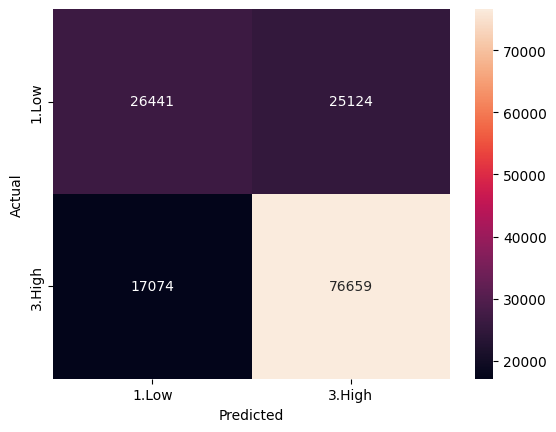

{'n_neighbors': 11}
0.7240118525351338
KNeighborsClassifier(n_neighbors=11)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.652017,0.386020,130.280299,2.839422,5,{'n_neighbors': 5},0.706284,0.707024,0.707170,0.707477,0.709043,0.707399,0.000911,4
1,2.454317,0.225796,146.815970,4.028885,7,{'n_neighbors': 7},0.715033,0.715867,0.715446,0.714669,0.717448,0.715693,0.000965,3
2,2.710826,0.341406,171.074688,9.054316,9,{'n_neighbors': 9},0.720332,0.720461,0.719377,0.719452,0.721354,0.720196,0.000728,2
3,2.826003,0.424498,198.494507,29.129395,11,{'n_neighbors': 11},0.724264,0.724118,0.723103,0.723556,0.725019,0.724012,0.000652,1


In [12]:
# ---------------------------------------------------
# Replicating the above steps for the KNN classifier
# ---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_hl_train, y_hl_train)
y_pred = knn.predict(X_hl_test)
accuracy_score(y_hl_test, y_pred)

print(classification_report(y_hl_test, y_pred))

cm = confusion_matrix(y_hl_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["1.Low", "3.High"], yticklabels=["1.Low", "3.High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for KNN
# ---------------------------------------------------

param_grid = {"n_neighbors": [5, 7, 9, 11]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_hl_train, y_hl_train)

print("Best parameters:", knn_cv.best_params_)
print("Best score:", knn_cv.best_score_)
print("Best estimator:", knn_cv.best_estimator_)

results = pd.DataFrame(knn_cv.cv_results_)
display(results)



### d. Build two SGDClassifier models predicting both responses (High-Low and High-Medium-Low)

#### SGDClassifier model for High-Low response

              precision    recall  f1-score   support

       1.Low       0.67      0.47      0.55     51565
      3.High       0.75      0.87      0.81     93733

    accuracy                           0.73    145298
   macro avg       0.71      0.67      0.68    145298
weighted avg       0.72      0.73      0.72    145298



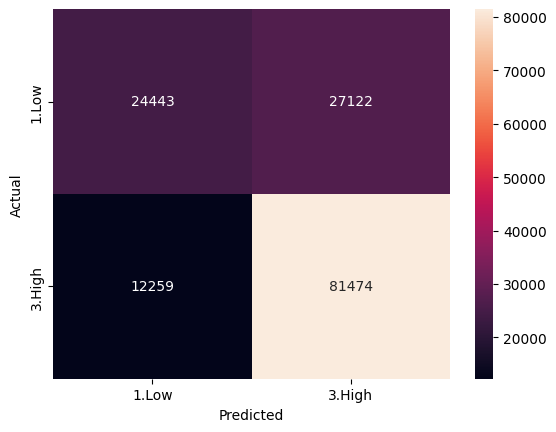

Best parameters: {'alpha': 0.001}
Best score: 0.7238707615031956
Best estimator: SGDClassifier(alpha=0.001)
Best index: 1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.703001,0.098424,0.315971,0.037870,0.0001,{'alpha': 0.0001},0.723791,0.722389,0.722698,0.721646,0.722963,0.722697,0.000702,2
1,1.285052,0.078423,0.348621,0.060237,0.0010,{'alpha': 0.001},0.723713,0.724522,0.723240,0.723195,0.724683,0.723871,0.000627,1
2,1.099804,0.054933,0.352678,0.051624,0.0100,{'alpha': 0.01},0.722208,0.722655,0.721769,0.721810,0.723315,0.722351,0.000579,3
3,0.938554,0.032273,0.266576,0.062701,0.1000,{'alpha': 0.1},0.690119,0.689697,0.690334,0.689273,0.689591,0.689803,0.000379,4
4,1.128795,0.110587,0.309220,0.061309,1.0000,{'alpha': 1},0.640901,0.640901,0.640909,0.640932,0.640906,0.640910,0.000012,5
5,1.484932,0.239889,0.332570,0.078110,10.0000,{'alpha': 10},0.640909,0.640909,0.386621,0.640906,0.640906,0.590050,0.101715,6
6,1.209050,0.048117,0.336027,0.036878,100.0000,{'alpha': 100},0.359142,0.640909,0.359151,0.640906,0.640906,0.528203,0.138034,7


In [14]:
# ---------------------------------------------------
# And now Replicating for the SGD classifier
# ---------------------------------------------------
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(loss="log_loss")
sgd.fit(X_hl_train, y_hl_train)
y_pred = sgd.predict(X_hl_test)
accuracy_score(y_hl_test, y_pred)

print(classification_report(y_hl_test, y_pred))

cm = confusion_matrix(y_hl_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["1.Low", "3.High"], yticklabels=["1.Low", "3.High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for SGD
# ---------------------------------------------------

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
sgd = SGDClassifier()
sgd_cv = GridSearchCV(sgd, param_grid, cv=5)

sgd_cv.fit(X_hl_train, y_hl_train)

print("Best parameters:", sgd_cv.best_params_)
print("Best score:", sgd_cv.best_score_)
print("Best estimator:", sgd_cv.best_estimator_)
print("Best index:", sgd_cv.best_index_)

results = pd.DataFrame(sgd_cv.cv_results_)
display(results)

### e. Compare the accuracy of all final models